In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score
from sklearn.datasets import make_blobs

create a dataset using the make_blobs function from sklearn

In [3]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,cluster_std=1,centers=4,n_features=2,
                  shuffle=True,center_box=(-10.0,10.0),random_state=2)

range_n_clusters = [2, 3, 4, 5, 6]

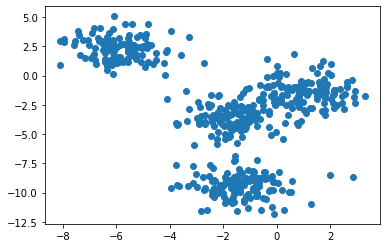

(500, 2)

In [4]:
# Plotting the data
plt.scatter(X[:,0],X[:,1])
plt.show()
X.shape

### Elbow Method

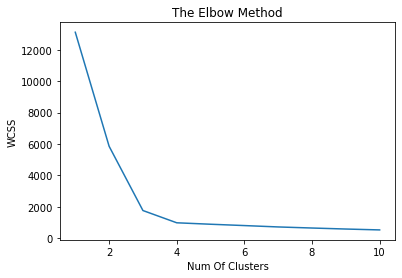

In [5]:
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)
   
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
clusterer = KMeans(n_clusters=4, random_state=10)
y_mean = clusterer.fit_predict(X)

In [10]:
y_mean

array([0, 1, 0, 2, 1, 2, 3, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 0, 1, 2, 1, 0,
       2, 3, 0, 0, 3, 2, 3, 0, 0, 2, 3, 3, 1, 1, 3, 3, 2, 0, 2, 1, 3, 2,
       1, 0, 0, 0, 1, 3, 0, 0, 2, 3, 0, 1, 2, 0, 3, 3, 3, 1, 1, 0, 3, 2,
       0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 3, 2, 3, 0, 1, 1, 2, 1, 3, 2, 1, 2,
       1, 2, 0, 2, 0, 1, 3, 3, 1, 1, 1, 2, 2, 0, 3, 3, 0, 1, 3, 1, 0, 0,
       0, 0, 3, 3, 0, 3, 1, 0, 3, 0, 0, 3, 0, 1, 1, 3, 3, 0, 0, 0, 2, 0,
       3, 3, 1, 0, 3, 1, 2, 0, 3, 0, 3, 3, 0, 1, 3, 0, 0, 0, 3, 2, 2, 1,
       2, 1, 0, 1, 0, 2, 1, 2, 1, 3, 0, 3, 2, 0, 0, 1, 0, 1, 3, 1, 0, 0,
       1, 2, 0, 2, 1, 2, 3, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1, 3, 2, 3, 3, 0,
       3, 3, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 3, 0, 3, 2, 0, 2, 3, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 3, 2, 0, 3, 0,
       2, 2, 2, 1, 1, 3, 2, 2, 0, 0, 2, 2, 0, 0, 3, 3, 2, 3, 1, 3, 1, 1,
       1, 0, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 3,
       2, 0, 3, 1, 2, 3, 3, 2, 1, 3, 1, 2, 1, 2, 2,

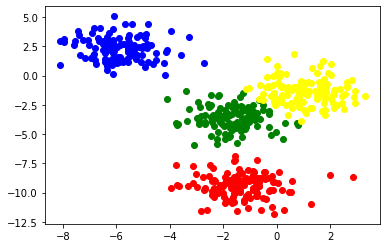

In [11]:
plt.scatter(X[y_mean == 0,0],X[y_mean ==0,1], color='red')
plt.scatter(X[y_mean ==1,0], X[y_mean==1,1], color= 'blue')
plt.scatter(X[y_mean ==2,0], X[y_mean==2,1], color= 'green')
plt.scatter(X[y_mean ==3,0], X[y_mean==3,1], color= 'yellow')
plt.show()

y_means give us different clusters corresponding to X. Now let’s plot all the clusters using matplotlib.

### Calculating the silhouette score

In [12]:
print(f'Silhouette Score(n=4): {silhouette_score(X, y_mean)}')

Silhouette Score(n=4): 0.6250462156493074


We can say that the clusters are well apart from each other as the silhouette score is closer to 1.

To check whether our silhouette score is providing the right information or not let’s create another scatter plot showing labelled data points.

https://medium.com/@Suraj_Yadav/silhouette-coefficient-explained-with-a-practical-example-assessing-cluster-fit-c0bb3fdef719

## Code 2

In [13]:
from sklearn import datasets
from sklearn.cluster import KMeans
#
# Load IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


Executing the above code predicts the Silhouette score of 0.55.